In [1]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# 릿지 회귀 모델 적용을 위해 Ridge 로딩
from sklearn.linear_model import Ridge

In [2]:
# 데이터셋 로딩
boston =load_boston()

# 데이터셋 분할
# random_state 값은 강의와 동일하게 지정하세요.
x_train, x_test, y_train, y_test = train_test_split(boston.data,boston.target,test_size=0.3,random_state=12)

In [3]:
# 규제를 위한 alpha 값 초기화
alpha = 0.1

# Rigde 클래스 객체 생성
ridge = Ridge(alpha=alpha)

# 규제 학습 수행
ridge.fit(x_train,y_train)

# 모델을 통한 예측
ridge_pred = ridge.predict(x_test)

In [4]:
# 학습된 모델에 대한 R^2 계산
r2_train = ridge.score(x_train,y_train)
r2_test = ridge.score(x_test,y_test)
print('Training-datasset R2 : {0:.3f}'.format(r2_train))
print('Test-datasset R2 : {0:.3f}'.format(r2_test))

Training-datasset R2 : 0.748
Test-datasset R2 : 0.708


In [5]:
# 컬럼별 회귀계수 저장한 Series 객체 생성 및 출력              
ridge_coef_table = pd.Series(data=np.round(ridge.coef_,1),index=boston.feature_names)
print('Ridge Regression Coefficients :')
print(ridge_coef_table.sort_values(ascending=False))

Ridge Regression Coefficients :
RM          3.6
CHAS        3.3
RAD         0.3
INDUS       0.1
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.8
DIS        -1.3
NOX       -15.7
dtype: float64


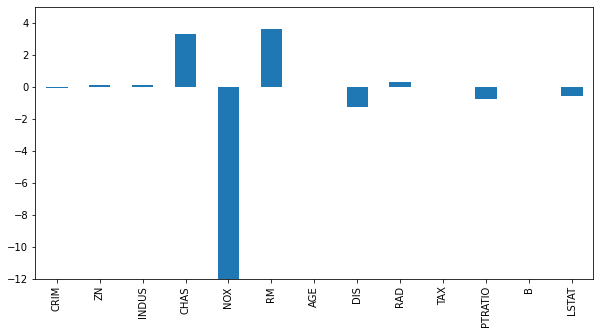

In [6]:
# 막대그래프 시각화 
plt.figure(figsize=(10,5))
ridge_coef_table.plot(kind='bar')
plt.ylim(-12,5)
plt.show()